# Intro to Scientific Computing

## Project 1

## Due date Tuesday,  December 5

NAMES: Rajdipa Chowdhury ,  Scott Itakura ,  Tyler Stewart


DATE: 12/08/17


## Teams of 2-3 people

**Send me an email (or message through Canvas) with the members of your team by Tuesday November 28.**


### Assignment Description for Projects:


In the last portion of this class we'll have two "project" assignments.

The goal of these projects is a bit different from the one of regular assignments. I will start you off with some concrete steps and then suggest options for extension. I would like you, in your groups, to decide which of these to pursue, to document your intentions and your work, and to show your results.

### These assignments are programming versions of your lab reports in other classes


** Grading **

**B**-level work on a project would sucessfully implment all of the main parts of questions **1 and 2**.

**A**-level work would involve a more in-depth exploration of one of the pathways for extension, would describe the motivation and results in detail (in markdown cells) and would show a plot/summary of the findings.


In [2]:
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline
from astropy.table import Table

## 1) Lift Forces (The Magnus Effect)


A spinning soccer ball generates an uneven flow pattern and a net **lift** force **perpendicular** to the direction of motion. The direction of this lift force is determined by the direction of the vector $\vec{\omega}\times\vec{v}$, where $\omega$ is the angular velocity vector indicating the direction of the rotation of the ball, and $v$ is the velocity with which the ball is moving.

This is how curve-balls get kicked around defenders and into the goal. 

Check out this page for a great description and some animations:
https://www.comsol.com/blogs/magnus-effect-world-cup-match-ball/

The magnitude for the magnus force is:
$$
\large
F_{\rm Magnus} = {1\over 2}C_{\rm L} \rho A v^2
$$ 

and it's direction is in the direction of the vector $(\hat{\omega} \times \hat{v})$. Our velocity vector has only components in $x$ and $y$, and we will choose an angular velocity vector along the $z$ component, which yields a vector :

$$
\vec{\omega}\times\vec{v} = -\omega_z v_y \hat{i} + \omega_z v_x \hat{j}\\
\\
\vec{\omega}\times\vec{v} = \omega_z( -v_y \hat{i} + v_x \hat{j})\\
$$

Now, this vector $\vec{\omega}\times\vec{v}$ has a magnitude given by:

$$
|\vec{\omega}\times\vec{v}| = |\omega||v|\sin\theta
$$

where $\theta$ is the angle between $\vec{\omega}$ and $\vec{v}$. However, we chose $\vec{\omega}$ to be perpendicular to the $XY$ plane, therefore perpendicular to $\vec{v}$. So $\sin\theta=\sin(\pi/2)=1$. This means that 
$|\vec{\omega}\times\vec{v}| = \omega v = \omega_z (v_x^2 + v_y^2)^{1/2}$. So the unitary vector in the direction of $\vec{\omega}\times\vec{v}$ is:

$$
\frac{\vec{\omega}\times\vec{v}}{|\vec{\omega}\times\vec{v}|} = \frac{1}{|\vec{\omega}\times\vec{v}|}w_z( -v_y \hat{i} + v_x \hat{j})\\
\\
\frac{\vec{\omega}\times\vec{v}}{|\vec{\omega}\times\vec{v}|} = \frac{1}{\omega_z v}\omega_z( -v_y \hat{i} + v_x \hat{j})\\
\\
\frac{\vec{\omega}\times\vec{v}}{|\vec{\omega}\times\vec{v}|} = \frac{1}{v}( -v_y \hat{i} + v_x \hat{j})
$$

This means that the magnus force for our spinning soccer ball is:

\begin{equation}
\begin{split}
\vec{F}_{\rm Magnus} &= {1\over 2}C_{\rm L} \rho A v^2\left(\frac{1}{v}( -v_y \hat{i} + v_x \hat{j}) \right)\\
\\
&= {1\over 2}C_{\rm L} \rho A v\left( -v_y \hat{i} + v_x \hat{j} \right)\\
\end{split}
\end{equation}


### a) Constructing  the ```deriv``` function
Based on the the ```deriv``` function we created in class to account for the drag force and gravity on a soccer ball, define a new ```deriv``` function to account for the drag force, gravity and the Magnus force we just derived in the text above.

In the same cell define all relevant constants ($A,\rho, C_L, C_d, g, m_{\rm ball}$).

We'll take a coefficient of lift of $C_L = 0.3$.
And the values for ($A,\rho, C_d, g, m_{\rm ball}$) we used in class.

Also see this paper if you're interested in the details of where I got $C_L$: http://goff-j.web.lynchburg.edu/Goff_Carre_EJP_2010.pdf



 question 1 was done by Tyler and Rajdipa. question 2 was done by Scott, Rajdipa and Tyler and question 3b was done by Rajdipa.  



In [21]:
Cd = 0.47 # cm/s^2  -> drag coefficient
Aball = 380 # cm^2  -> cross section of soccer ball
rhoair = 0.001225  # g/cm^3
mball = 425 # g
g = -981.0
Cl = 0.3



def deriv(vec):
    t = vec[0]
    x = vec[1]
    y = vec[2]
    vx = vec[3]
    vy = vec[4]
    
    v = sqrt(vx**2 + vy**2)
    
    dtdt = 1
    dxdt = vx
    dydt = vy
    dvxdt = (-Cd*rhoair*Aball*v*vx - Cl*rhoair*Aball*v*vy) / (2.*mball)
    dvydt = g - (Cd*rhoair*Aball*v*vy - Cl*rhoair*Aball*v*vx) / (2.*mball)
    
    return array([dtdt, dxdt, dydt, dvxdt, dvydt])
 

### b) Setup and integrate

Assuming that our soccer ball is initially at $x=0$, $y=0$ (at $t_0 = 0$) and that the initial $v_x$, $v_y$ components of the velocity are 20 m/s each (2000 cm/s). Use the Midpoint method we built in class to integrate the trajectory of a soccer ball from $t=0$ to $t=10$ s. 

**Remember to follow this steps**


* Define the initial conditions
* Define the ```times``` array to sample the times were you want to evolve your variables. (Remember that the number of points used to sample an time interval, determine $\Delta t$).
* Obtain $\Delta t$
* Define the array ```sol``` that will contain the variables that will be evolved in time
* Define the array ```result``` that will contain the evolved variables from ```sol``` at different times
* Write the core of the Midpoint method consisting of an iteration (```for``` loop) where ```sol``` is updated and ```result``` is filled with the current values.
* Define a table from the ```result``` array


In [22]:
Nsteps = 100
times = linspace(0,10,Nsteps)
t0 = 0.
x0 = 0.
y0 = 0.
vx0 = 2000 # cm /s
vy0 = 2000 # cm /s
icond = array([t0,x0,y0,vx0,vy0])
dt = times[1] - times[0]
sol = icond
result = zeros( (len(times),len(icond)) )
print 'Using dt =', dt
for i,t in enumerate(times):
    
    #saves current value of t, and f in the array results
    result[i] = sol
    
    # print current value of t and f 
    print '-----------'
    print 't,      f'
    print sol[0], sol[1]
    print '------------'
    
    #Update value of f and t using Euler's method
    k1 = dt*deriv(sol)
    k2 = dt*deriv(sol + k1/2.)
    sol = sol + k2
    
column_names =['t','x','y','vx','vy']
data = Table(result,names=column_names)

Using dt = 0.10101010101
-----------
t,      f
0.0 0.0
------------
-----------
t,      f
0.10101010101 189.850888247
------------
-----------
t,      f
0.20202020202 359.922498489
------------
-----------
t,      f
0.30303030303 513.598498655
------------
-----------
t,      f
0.40404040404 653.601242829
------------
-----------
t,      f
0.505050505051 782.144838348
------------
-----------
t,      f
0.606060606061 901.047002855
------------
-----------
t,      f
0.707070707071 1011.81211124
------------
-----------
t,      f
0.808080808081 1115.6937077
------------
-----------
t,      f
0.909090909091 1213.74212046
------------
-----------
t,      f
1.0101010101 1306.84109336
------------
-----------
t,      f
1.11111111111 1395.73620236
------------
-----------
t,      f
1.21212121212 1481.05705426
------------
-----------
t,      f
1.31313131313 1563.33474656
------------
-----------
t,      f
1.41414141414 1643.01572728
------------
-----------
t,      f
1.51515151515 1720.472985

### c) Plot and describe your results


Using the table containing your results, make a plot of the position of the ball $x$ vs $y$ obtained from the Midpoint method (You can start by using Euler's method and change your code to use midpoint once we go over it in class next monday, it is a simple operation).  

* Use boolean selection to only plot the position of the ball for $y>0$ (we did this before in projectile motion)
* Try using different number of points ```Npoints``` in the ```times```  array starting with a low number (like 5 or 10).
* Describe what do you observe as you increase the number of points in ```times```.
* How large does ```Npoints``` has to be to see no further change in the trajectory of the ball?
* ** Label your axes and make the plot as good looking as possible. Remember this is a final proyect. **
* Describe what is going on with the ball and in which direction it is rotating.
* What would you change in your code, to account for a ball rotating in the opposite direction?
* What do you expect to see if the ball rotates in the opposite direction?

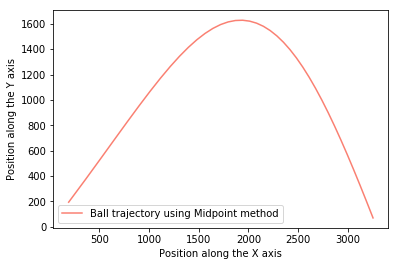

In [23]:
end = data['y'] > 0
plot(data['x'][end],data['y'][end],color = 'Salmon', Label="Ball trajectory using Midpoint method")
xlabel('Position along the X axis')
ylabel('Position along the Y axis')
legend(loc=0)

As we increase the amount of Npoints, Our line becomes more and more curved. With fewer Npoints our line looks more like a low dimension polygon than a smooth continuous curve. The curve stops changing signififcantly around 70. At very low values of Npoint the ball appears to move backwards. This is due to an extremely low value for dt. The ball was rotating counter to the direction of the motion. To change the direction of rotation we would switch the signs of the acceleration component due to the magnus effect in dvx/dt and dvy/dt.

# Simulating Gravitational Dynamics with Ordinary Differential Equations


## 2) Orbital motion in the solar system

Lets set up the expressions for the orbital motion of a planet in our solar system.  A planet under the gravitational influence of the sun follows a trajectory that can be described by a vector in 2 dimensions. The position of the planet is given by the vector $\vec{r}=(x,y)$ and the acceleration due to the gravitational pull form the Sun of mass $M_\odot$ can be written as:

$\Large \vec{a} = -\frac{G M_\odot}{r^3}\vec{r}$ ,

Where $r=\sqrt{x^2 + y^2}$ is the magnitude of the position vector $\vec{r}$.

The first step to break this down is to re-write the acceleration:

$\Large \vec{a} = \frac{d^2 \vec{r} }{d t^2}$

In other words, it's the second derivative of the position $\vec{r}$.  So we can re-write our equation as 

$\Large \frac{d^2 \vec{r} }{d t^2} = -\frac{G M_\odot}{r^3}\vec{r}$

As we saw in class, in order to solve this 2nd order differential equation numerically, we need to re-write it as two first order equations. We use the definition of velocity to get this two first order equations:  

$\Large \frac{d \vec{r}}{dt} = \vec{v}$

$\Large \frac{d \vec{v}}{dt} = -\frac{G M_\odot}{r^3}\vec{r}$

BUT, these equations contain vectors $\vec{r} = (x,y)$ and $\vec{v} = (v_x,v_y)$.  That means that, each one of these equations transforms into two equations (one for each component):

$\Large \frac{d x}{dt} = v_x$

$\Large \frac{d y}{dt} = v_y$

$\Large \frac{d v_x}{dt} = -\frac{G M_\odot}{r^3} x$

$\Large \frac{d v_y}{dt} = -\frac{G M_\odot}{r^3} y$

In the cells below, lets try to assemble the 'derivs' function for this set of coupled first-order differential equations.

### a) Plotting Orbits 

Go back to your work on HW 2 and remind yourself of the formulae for the minimum and maximum distance to a planet. 
* Re-create the plot of the orbit of planet 9 in this notebook. **Later, we'll want to plot your numerical version on top of this plot**. 


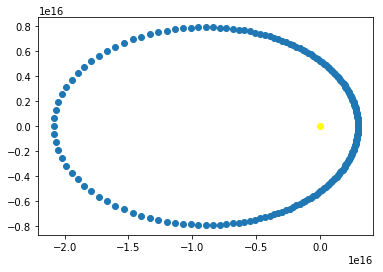

In [6]:
rp = 200*1.49*10**13 #Rmax Au
ra =  1400*1.49*10**13
a = 800*1.49*10**13 #AU
#Solving for e "Orbital eccentricity"
# -(rp/a)+1=e
e = -(rp/a) + 1
f = arange(0,2*pi,0.01*pi)



def planet_r(f,a,e):
    return ((a*(1.-e**2.))/(1. + e*cos(f)))

r = planet_r(f,a,e)

time = linspace(1,9,9)
rp_2 = a*(1-e)
ra = a*(1+e)
x_s = 0
y_s = 0
x = r*cos(f)
array(x)
y = r*sin(f)
array(y)
scatter(x,y,label='Planet 9')
scatter(0,0,color='Yellow',label = 'Sun')


### b) Constructing the ```deriv``` function

Define a derivatives function based on the expressions above. As in the projectile motion, there should be 5 variables  that we'll be updating $(t, x,y,v_x,v_y)$ and five corresponding derivatives $(dt/dt, dx/dt,dy/dt,dv_x / dt, dv_y / dt)$. Define $G=6.67\times10^{-8}$ cm$^3$ g$^{-1}$ s$^{-2}$ , $M_\odot=1.989\times10^{33}$ grams as constants inside your function.  

In [7]:
G = 6.67*10**-8 #Cm^3/g*s^2
Ms = 1.989*10**33 #g

def deriv(vec):
    t = vec[0]
    x = vec[1]
    y = vec[2]
    vx = vec[3]
    vy = vec[4]
    
    r = sqrt(x**2 + y**2)
    
    dtdt = 1.0
    dxdt = vx
    dydt = vy
    dvxdt = ((-G*Ms)/r**3)*x
    dvydt = ((-G*Ms)/r**3)*y
    return array([dtdt, dxdt, dydt, dvxdt, dvydt])

### c) Setup and Integrate

Using the 4th Order Runge Kutta approach we built in class, integrate the orbit of our hypothetical "planet 9" over at least one orbit. **MAKE A PLOT (with points) showing your result compared to the analytic version. ** 
- Integrate from $t=0$ to $t=30,000$ years (convert this to seconds). 
- Define initial conditions at the point of maximum distance from the sun, in the $-x$ direction (see HW 2). Remember that we used $a = 800$ AU $= 1.19\times 10^{16}$ cm and eccentricity $e=0.75$. Use those same parameters here. 
$$
r_{\rm max} = a(1+e)
$$

- The velocity at this point will all be directed in the $+y$-direction, with magnitude 
$$
v_y = \sqrt{G M_\odot \left( {2 \over r_{\rm max}} - {1 \over a} \right) }.
$$

- Start by taking 100 steps in the ```times``` array

#### Hint: A Strategy

In order to complete this problem, cut and paste the soccer ball code we worked with in class. 

- Replace all calls to the derivatives function with your new planetary-motion derivatives. 

- Change the initial conditions to be consistent with the position and velocity of planet 9 at the far point in its orbit. 

- Change the total time span (in the times array) to include enough total time for the planet to complete its orbit (in seconds). 



[  0.00000000e+00  -2.08600000e+16   0.00000000e+00   0.00000000e+00
   3.98743082e+04]


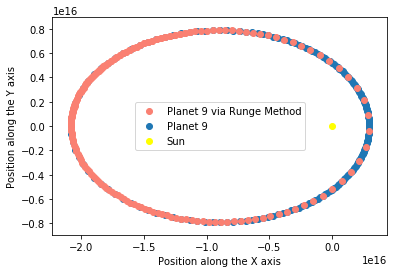

In [8]:
Nsteps = 200
 #Rmax Au
a = 800*1.49*10**13 #AU
rmax = a*(1+.75)
times = linspace(0,9.4608*10**11,Nsteps)
t0 = 0.
x0 = -rmax
y0 = 0.
vx0 = 0. # cm /s
vy0 = (G*Ms*(2/rmax - 1/a))**(1./2.) # cm /s
icond = array([t0,x0,y0,vx0,vy0])
dt = times[1] - times[0]
sol = icond
result = zeros( (len(times),len(icond)) )
print sol

for i,t in enumerate(times):
    
    #saves current value of t, and f in the array results
    result[i] = sol
    
    # print current value of t and f 
    #print '-----------'
    #print 'x,      y'
    #print sol[1], sol[2]
    #print '------------'
    
    #Update value of f and t using Runge
    k1 = dt*deriv(sol)
    k2 = dt*deriv(sol + k1/2.)
    k3 = dt*deriv(sol + k2/2.)
    k4 = dt*deriv(sol + k3)
    
    sol = sol + k1/6. + k2/3. + k3/3. + k4/6.
    
column_names =['t','x','y','vx','vy']
data = Table(result,names=column_names)

plot(data['x'],data['y'],'o',color = 'Salmon', Label="Planet 9 via Runge Method")
xlabel('Position along the X axis')
ylabel('Position along the Y axis')


rp = 200*1.49*10**13 #Rmax Au
a = 800*1.49*10**13 #AU
#Solving for e "Orbital eccentricity"
# -(rp/a)+1=e
e = -(rp/a) + 1
f = arange(0,2*pi,0.01*pi)



def planet_r(f,a,e):
    return ((a*(1.-e**2.))/(1. + e*cos(f)))

r = planet_r(f,a,e)

time = linspace(1,9,9)
rp_2 = a*(1-e)
ra = a*(1+e)
x_s = 0
y_s = 0
x = r*cos(f)
array(x)
y = r*sin(f)
array(y)
scatter(x,y,label='Planet 9')
scatter(0,0,color='Yellow',label = 'Sun')
legend(loc=0)

### d) Make the plot (if you haven't) and describe your results

* Make a plot of the analytical trajectory (as we did in Hwk 2) for planet 9
* ** On top** of the analytical plot, plot of the trajectory you obtained for planet 9 using the Runge Kutta method. 
* Try taking 100 steps, then 300, then 1000. How many steps are needed to generate an orbit that matches your analytic plot? 




Make a markdown cell and use it to describe the results of your work. Some topics you could touch on include:
* How did you modify the code to get it to work? 
* How many integration steps are needed to obtain a good result?
* What does the orbit look like when the integration goes poorly? 
* When it goes well? 
* How can we evaluate the results of numerical integration?

we modified the code for deriv for the motion of a soccer ball from the class. first we changed the expression for position, velocity and acceleration and the array that the deriv function returned. we also gave new initial conditions to the deriv function. 
we had to take 200 integration steps for it to match our analytic plot (a good result). 

when the integration goes poorly, the orbit looks like it starts to spiral in.
when it goes well, we have an ellipse that overlaps our analytical solution that we obtained from hw #2. 

we can compare the x and y values obtained from 4th order the Runge Kutta method to the values from the analytic solution. and we can take a percentage difference between the respective values to find how precise out results were. Also, looking at the plot gives us a good sense of our accuracy. if the points from the result over lap with the points obtained from the analytic solution we can make an assumption that our results were pretty accurate.  



# Ideas For Extension 

**You can either pick and pursue one of these ideas for extension or discuss your own idea to build on what we have above with me.**



## 3 a) Red Dwarf Falls through the Solar System

For our second problem, construct a simulation of a Red Dwarf (a low mass star) passing through the solar system. In this simulation we're looking to describe the motion of three objects, Earth, Sun and the red dwarf, each one has it's own position and velocity and we need to describe how all of them  change. The simulation should have the following characteristics:

(0) Assume that at $t=0$ the 0.1 solar mass Red Dwarf enters the solar system at a distance x=5AU, y=1AU, vx=-15km/s, vy=0km/s relative to the Sun. Assume that the **Earth** is on its current (assumed circular) orbit around the Sun. Neglect everything else in the solar system. 
- Setup an integration of **Earth's** orbital motion around the sun by modifying the initial conditions of the planet 9 expressions from #1 to be relevant to earth. 

(1) Modify the "derivs" function to account for the gravitational attractions from both the Sun and the Red Dwarf. **The Sun attracts the Red Dwarf and the Earth, and the Red Dwarf attracts the Sun and the Earth**. Neglect the Earth's pull on the Sun and the Red Dwarf. This implies a system of 12 variables (plus the time), with derivatives that account for the relative distances between objects. Why? 

- As a first step you can add each one of the variables (13 variables in, 13 derivatives out) to the array `sol` and the derivatives function we used before. **Start by setting the mass of the red dwarf equal to zero** (this should reproduce Earth's orbit around the sun with the red ddwarf just passing by and not disturbing the Sun-Earth system). Work toward your full expressions one-by-one so that you can catch your mistakes. 

(2) Initial conditions and integration. 
* Assume the Sun is initially at (0,0) with no velocity, and that Earth orbits the Sun initially at (-1 AU, 0) with a positive velocity in the Y direction given by the equation we used for planet 9 (but for Earth's orbit eccentricity and semimayor axis).

* Start by integrating the motion for 10 years. **Make sure you select an adequate $dt$ to capture the right orbital motion of the 3 bodies**

* Save your result into a table you can manipulate later and make a plot (with equal axis ratio) that shows the motion of all three bodies. 

* Now integrate the motion of the 3 bodies for 30 years and save the result into a different table. 



(3) Further data analysis.

 
 * From your results, obtain the location of the center of mass of the 3 body system which depends on their masses $M_e, M_s, M_{rd} $. and position vectors $\mathbf{r}_e, \mathbf{r}_s, \mathbf{r}_{rd}$:
 
 \begin{equation}
 \mathbf{r}_{CM} = \frac{M_e  \mathbf{r}_e + M_s  \mathbf{r}_s + M_{rd}  \mathbf{r}_{rd}}{M_e + M_s + M_{rd}}
 \end{equation}
 
     * Make a plot of the position of the three bodies with respect to the center of mass of the system (that is $\mathbf{r}_e - \mathbf{r}_{CM}$, $\mathbf{r}_s - \mathbf{r}_{CM}$ and $\mathbf{r}_{rd} - \mathbf{r}_{CM}$)
 
 
 * From your results obtain the distance Earth-Sun, the distance Earth-Red Dwarf and make a plot showing how they evolve as a function of time.
 
 * Describe your plots and try to predict what will happen to the Earth-Sun system after 60 years

 * What changes if Earth is located at (1AU,0), instead of (-1AU,0) at $t=0$?



## 3 b) Rocket/Spaceship Motion in the Solar System

Imagine we launched a rocket or spaceship from Earth's orbit out into the solar system (ignore the stage of escaping from earth's surface), and now it is orbiting the Sun in a circular orbit at 1 AU. 

The rocket can be accelerated by the thrust from the rocket fuel which is shot out the back of the rocket. The force due to this acceleration is given by:

$$
\large
\vec{F}_{\rm thrust} = \vec{u} \  {dm \over dt}
$$

where $u$ is the velocity that material is shot from the rocket, and $dm/dt$ is the mass-loss rate of buring through fuel (which is what is combusted and ejected out of the burners). 

This implies an acceleration 
$$
\large
\vec{a}_{\rm thrust} = { \vec{u} \over M_{\rm rocket}} {dm \over dt}
$$

If the thrust is aligned with the direction of motion, then the $x$ and $y$ components of the force are given by:

$$
\large
a_{{\rm thrust},x} = { u \over M_{\rm rocket}} {dm \over dt} {v_x \over v} \\
\large
a_{{\rm thrust},y} = { u  \over M_{\rm rocket}} {dm \over dt}  {v_y \over v}
$$

where, $\vec{v}=(v_x,v_y)$ is the orbital velocity (without the thrust). 


#### Where to start

* Define the derivatives and use the Runge Kutta method to integrate the motion of the rocket around the Sun. 
    * Start by assuming that the rocket's mass doesn't change in time.
* Assume that the thrust effective velocity $u$ is 3e7 cm/s, that the spaceship has a mass of  1e8 gram that starts 1 AU from the sun going 30 km/s


#### Defining $dm/dt$

* Start by obtaining the orbit of the rocket assuming $dm/dt=0$. 
    * Gradually increase $dm/dt$ until you see a noticeable change in the orbit.
    * How large does $dm/dt$ has to be to see a change in the orbit?

* Plot rocket trajectories under different assumptions of thrust parameters (mass loss). 


* How does the orbit changes if the thrust is anti-aligned with the orbital motion? 

* Add the mass of the rocket as one of your integration variables. You'll need to update the mass in the same way you update positions and velocities.

    * Decrease the rocket mass each step by $\frac{dm}{dt}  \Delta t$ (make the derivative constant -- (e.g. $\frac{dm}{dt} = - C$)

In [9]:
def deriv1(vec):
    t = vec[0]
    x = vec[1]
    y = vec[2]
    vx = vec[3]
    vy = vec[4]
    m = vec[5]
    
    r = sqrt(x**2+y**2)
    
    v = sqrt(vx**2 + vy**2)
    
    dtdt = 1.0
    dxdt = vx
    dydt = vy

    dmdt =  0
    
    dvxdt = ((-G*Ms)/r**3)*x + (3e7/m)*dmdt*(vx/v)
    dvydt = ((-G*Ms)/r**3)*y + (3e7/m)*dmdt*(vy/v)
    
    return array([dtdt, dxdt, dydt, dvxdt, dvydt, dmdt])

    

[  0.00000000e+00  -1.49000000e+13   0.00000000e+00   0.00000000e+00
   2.98391999e+06   1.00000000e+08]


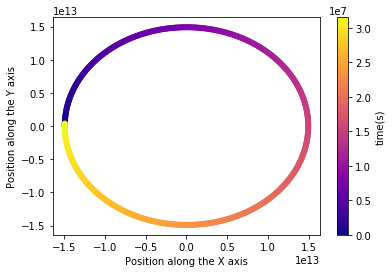

In [10]:
Nsteps = 600
 #Rmax Au
a = 1.49*10**13 #AU
rmax = a*(1+0)
times = linspace(0,3.15e7,Nsteps)
t0 = 0.
x0 = -rmax
y0 = 0.
vx0 = 0. # cm /s
vy0 = (G*Ms*(2/rmax - 1/a))**(1./2.)  # cm /s
mo = 1e8 #gram
icond = array([t0,x0,y0,vx0,vy0,mo])
dt = times[1] - times[0]
sol = icond
result = zeros( (len(times),len(icond)) )
print sol

for i,t in enumerate(times):
    
    #saves current value of t, and f in the array results
    result[i] = sol
    

    
    k1 = dt*deriv1(sol)
    k2 = dt*deriv1(sol + k1/2.)
    k3 = dt*deriv1(sol + k2/2.)
    k4 = dt*deriv1(sol + k3)
    
    sol = sol + k1/6. + k2/3. + k3/3. + k4/6.
    
column_names =['t','x','y','vx','vy','m']
data = Table(result,names=column_names)

scatter(data['x'],data['y'],c = data['t'],cmap = cm.plasma,marker = 'o',edgecolors='None', label="rocket via Runge Method")
colorbar(label='time(s)') 
xlabel('Position along the X axis')
ylabel('Position along the Y axis')



In [11]:
def deriv2(vec):
    t = vec[0]
    x = vec[1]
    y = vec[2]
    vx = vec[3]
    vy = vec[4]
    m = vec[5]
    
    r = sqrt(x**2+y**2)
    
    v = sqrt(vx**2 + vy**2)
    
    dtdt = 1.0
    dxdt = vx
    dydt = vy

    dmdt =  1e-1
    
    dvxdt = ((-G*Ms)/r**3)*x + (3e7/m)*dmdt*(vx/v)
    dvydt = ((-G*Ms)/r**3)*y + (3e7/m)*dmdt*(vy/v)
    
    return array([dtdt, dxdt, dydt, dvxdt, dvydt, dmdt])


[  0.00000000e+00  -1.49000000e+13   0.00000000e+00   0.00000000e+00
   2.98391999e+06   1.00000000e+08]


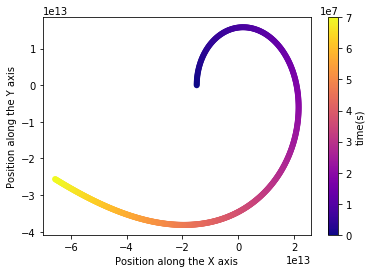

In [12]:
Nsteps = 600
 #Rmax Au
a = 1.49*10**13 #AU
rmax = a*(1+0)
times = linspace(0,7e7,Nsteps)
t0 = 0.
x0 = -rmax
y0 = 0.
vx0 = 0. # cm /s
vy0 = (G*Ms*(2/rmax - 1/a))**(1./2.)  # cm /s
mo = 1e8 #gram
icond = array([t0,x0,y0,vx0,vy0,mo])
dt = times[1] - times[0]
sol = icond
result = zeros( (len(times),len(icond)) )
print sol

for i,t in enumerate(times):
    
    
    result[i] = sol
    
   
    
    
    k1 = dt*deriv2(sol)
    k2 = dt*deriv2(sol + k1/2.)
    k3 = dt*deriv2(sol + k2/2.)
    k4 = dt*deriv2(sol + k3)
    
    sol = sol + k1/6. + k2/3. + k3/3. + k4/6.
    
column_names =['t','x','y','vx','vy','m']
data = Table(result,names=column_names)

scatter(data['x'],data['y'],c = data['t'],cmap = cm.plasma,marker = 'o',edgecolors='None', label="rocket via Runge Method")
colorbar(label='time(s)') 
xlabel('Position along the X axis')
ylabel('Position along the Y axis')


In [13]:
def deriv3(vec):
    t = vec[0]
    x = vec[1]
    y = vec[2]
    vx = vec[3]
    vy = vec[4]
    m = vec[5]
    
    r = sqrt(x**2+y**2)
    
    v = sqrt(vx**2 + vy**2)
    
    dtdt = 1.0
    dxdt = vx
    dydt = vy

    dmdt =  1e-1
    
    dvxdt = ((-G*Ms)/r**3)*x + (3e7/m)*dmdt*(-vx/v)
    dvydt = ((-G*Ms)/r**3)*y + (3e7/m)*dmdt*(-vy/v)
    
    return array([dtdt, dxdt, dydt, dvxdt, dvydt, dmdt])


[  0.00000000e+00  -1.49000000e+13   0.00000000e+00   0.00000000e+00
   2.98391999e+06   1.00000000e+08]


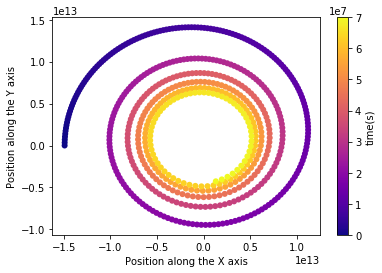

In [14]:
Nsteps = 600
 #Rmax Au
a = 1.49*10**13 #AU
rmax = a*(1+0)
times = linspace(0,7e7,Nsteps)
t0 = 0.
x0 = -rmax
y0 = 0.
vx0 = 0. # cm /s
vy0 = (G*Ms*(2/rmax - 1/a))**(1./2.)  # cm /s
mo = 1e8 #gram
icond = array([t0,x0,y0,vx0,vy0,mo])
dt = times[1] - times[0]
sol = icond
result = zeros( (len(times),len(icond)) )
print sol

for i,t in enumerate(times):
    
   
    result[i] = sol
    
    
    
    
    k1 = dt*deriv3(sol)
    k2 = dt*deriv3(sol + k1/2.)
    k3 = dt*deriv3(sol + k2/2.)
    k4 = dt*deriv3(sol + k3)
    
    sol = sol + k1/6. + k2/3. + k3/3. + k4/6.
    
column_names =['t','x','y','vx','vy','m']
data = Table(result,names=column_names)

scatter(data['x'],data['y'],c = data['t'],cmap = cm.plasma,marker = 'o',edgecolors='None', label="rocket via Runge Method")
colorbar(label='time(s)') 
xlabel('Position along the X axis')
ylabel('Position along the Y axis')


dm/dt has to be equal to 10**(-1) to see a significant change in the orbit. Intially when we change the dm/dt from 0  to a constant the orbit was spiraling outward. but then we plotted the orbit with the thrust anti aligned with the orbital motion we can see that the orbit spirals inward. 